# Vapor Liquid Equilibrium

**Equilibrium** is generally defined for an isolated system. We learned previously that for isolated systems (systems without the flow of mass and energy across the system boundary) that the mass, energy, and entropy balance expressions simplify to:

$\quad\dfrac{dM}{dt}=0$

$\quad\dfrac{dU}{dt}=0$

$\quad\dfrac{dS}{dt}=\dot{S}_{gen}$

Under these circumstances, the only changes that take place occur due to internal temperature, mass, and velocity gradients present within the system that will dissipate over time. This dissipation will generate entropy and cause the total system energy to increase with time. Ultimately, if we wait long enough then the gradients will be eliminated and all time evolution of the system will stop. We call this state *equilibrium*.

At equilibrium $S$ is both at a maximum (due to the entropy generation term always being positive) and no longer time dependent. Mathematically, 

## We define Equilibrium with Two Criteria:

1. $dS=0$

2. $d^2S<0$


### $dS=0$: Equivalence of Temperature, Pressure, and Free Energy of the vapor and liquid phase

For an isolated system with volume $V$, containing $N$ moles of gas, we can envision there being an equilibrium between a vapor and liquid and we want to know what are the constraints on those two phases. 

To identify those constraints, we assume that the entropy is a function of $V$, $N$, and $U$ and begin by expressing the entropy in its *differential form* as:

$$dS=\bigg(\dfrac{\partial S}{\partial U}\bigg)_{V,N} dU+
\bigg(\dfrac{\partial S}{\partial V}\bigg)_{N,U} dV+
\bigg(\dfrac{\partial S}{\partial N}\bigg)_{U,V} dN
$$

our thermodynamic relationships can be employed to transform the above to:

$$dS=\dfrac{1}{T} dU+
\dfrac{P}{T} dV-
\dfrac{\underline{G}}{T} dN
$$

In order for $dS=0$ the prefactors of the total differentials above must be uniform everywhere within the system. So if we consider for example a vapor (v) and liquid (l) to be in equilibrium for a given density and internal volume, then equilibrium will be satisfied if:

$$dS=dS^v+dS^l=0$$

$$
\bigg(\dfrac{1}{T^{v}}dU^v+\dfrac{1}{T^{l}}dU^l\bigg)+
\bigg(\dfrac{P^v}{T^v} dV^v+\dfrac{P^l}{T^l} dV^l\bigg)-
\bigg(\dfrac{\underline{G}^v}{T^v} dN^v+\dfrac{\underline{G}^l}{T^l} dN^l\bigg)=0
$$

Because the system is isolated, N, V, and U are constant at equilibrium throughout the box so that 

$\quad dN=dN^v+dN^l=0$

$\quad dU=dU^v+dU^l=0$

$\quad dV=dV^v+dV^l=0$

Therefore, the above can be rewritten as:

$$
\bigg(\dfrac{1}{T^{v}}-\dfrac{1}{T^{l}}\bigg)dU^v+
\bigg(\dfrac{P^v}{T^v}-\dfrac{P^l}{T^l}\bigg)dV^v-
\bigg(\dfrac{\underline{G}^v}{T^v}-\dfrac{\underline{G}^l}{T^l}\bigg)dN^v=0
$$

Inspecting the equation above, $dS=0$, if three criteria are satisfied.

1. Thermal Equilibrium - $T^{v}=T^{l}$

2. Mechanical Equilibrium - $P^{v}=P^{l}$

3. Free Energy - $\underline{G}^v=\underline{G}^l$


## Stability - $d^2S<0$

A similar, though tedious argument can be made to derive an expression for $d^2 S$. Without derivation, I provide the result as:

$$C_v=\bigg(\dfrac{\partial \underline{U}}{\partial T}\bigg)_V>0$$


$$\bigg(\dfrac{\partial P}{\partial \underline{V}}\bigg)_T<0$$

While the mathematical significance of these relationships is clear, they also provide some important intuition. An unstable thermodynamic state is one where an increase in temperature leads to a decrease in internal energy and the rate of molecular fluctuations. Clearly this is counterintuitive and no substance exists that obeys such behavior. The second criteria is more useful as it is something that can be evaluated using the equation of state alone. We will see this shortly.

## Actual Equilibrium

Let's return to the criteria for equilibrium for a second which are:

1. $T^{v}=T^{l}$

2. $P^{v}=P^{l}$

3. $\underline{G}^v=\underline{G}^l$

It is relatively easy to recognize how an equation of state might be used to evalue Criteria (1) and (2), but (3) is a little bit more difficult to see. As a starting point, we will return to using phasepy to compute the real isotherm of water vapor and liquid water in equilibrium. 



## Example

Use the information in the steam tables to show that the above criteria are satisfied for steam at $100^{o}C$ and $P=0.10135$ $MPa$

## Interactive Example

Using the Peng Robinson Equation of state and the critical properties for steam, 

1. Identify the saturation pressure for any isotherm $T<T_c$

2. Identify the unstable phase points for any isotherm $T<T_c$

<IPython.core.display.Javascript object>


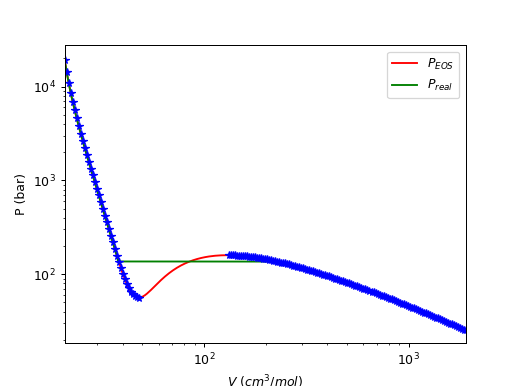

C:\Users\jjr1573\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


interactive(children=(FloatSlider(value=0.93, description='Tr', max=0.99, min=0.92, step=0.001), Output()), _d…

In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

from phasepy import component, mixture, preos
Tc=647.13
Pc=220.55
w=0.344861
Tr=0.95

water = component(name='water', Tc=Tc, Pc=Pc, w=w)
eos=preos(water,'mhv_unifac')
R=8.314 
##create the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('P (bar)')
plt.xlabel(r'$V$ $(cm^3/mol)$')

v=np.logspace(np.log10(eos.b[0]*1.1),np.log10(100*eos.b[0]),201)
if(Tr<1):
    psat,vl,vv=eos.psat(Tr*Tc)
    
    
    mask=(v<=vl) | (v>=vv)
    line1, = ax.plot(v,eos(Tr*Tc,v),'r')
    P=eos(Tr*Tc,v)
    
    dPdV=np.gradient(P,v)
    
    P_=np.concatenate((np.insert(P[v<=vl],-1,psat),np.insert(P[v>=vv],0,psat)))
    V_=np.concatenate((np.insert(v[v<=vl],-1,vl),np.insert(v[v>=vv],0,vl)))
                      
    line2, = ax.plot(V_,P_,'g')
    line3, = ax.plot(v[dPdV<=0],P[dPdV<=0],'*b')
else:
    line1, = ax.plot(v,eos(Tr*Tc,v),'r')

plt.xlim(min(v),max(v))



##update the plot
def update(Tr = 0.93):
    psat,vl,vv=eos.psat(Tr*Tc)

    mask=(v<vl) | (v>vv)
    line1.set_data(v,eos(Tr*Tc,v))
    line1.set_label(r'$P_{EOS}$')
    P=eos(Tr*Tc,v)

    P_=np.concatenate((np.insert(P[v<=vl],-1,psat),np.insert(P[v>=vv],0,psat)))
    V_=np.concatenate((np.insert(v[v<=vl],-1,vl),np.insert(v[v>=vv],0,vl)))
    
    dPdV=np.gradient(P,v)
    line3.set_data(v[dPdV<=0],P[dPdV<=0])
    line2.set_data(V_,P_)
    line2.set_label(r'$P_{real}$')
    
    #plt.annotate()
    plt.legend()
    fig.canvas.draw_idle()

interact(update,Tr=(0.92,0.99,0.001));
